<a href="https://colab.research.google.com/github/rfortuna98/QNC-Fall-2025/blob/main/Binomial_Bonus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

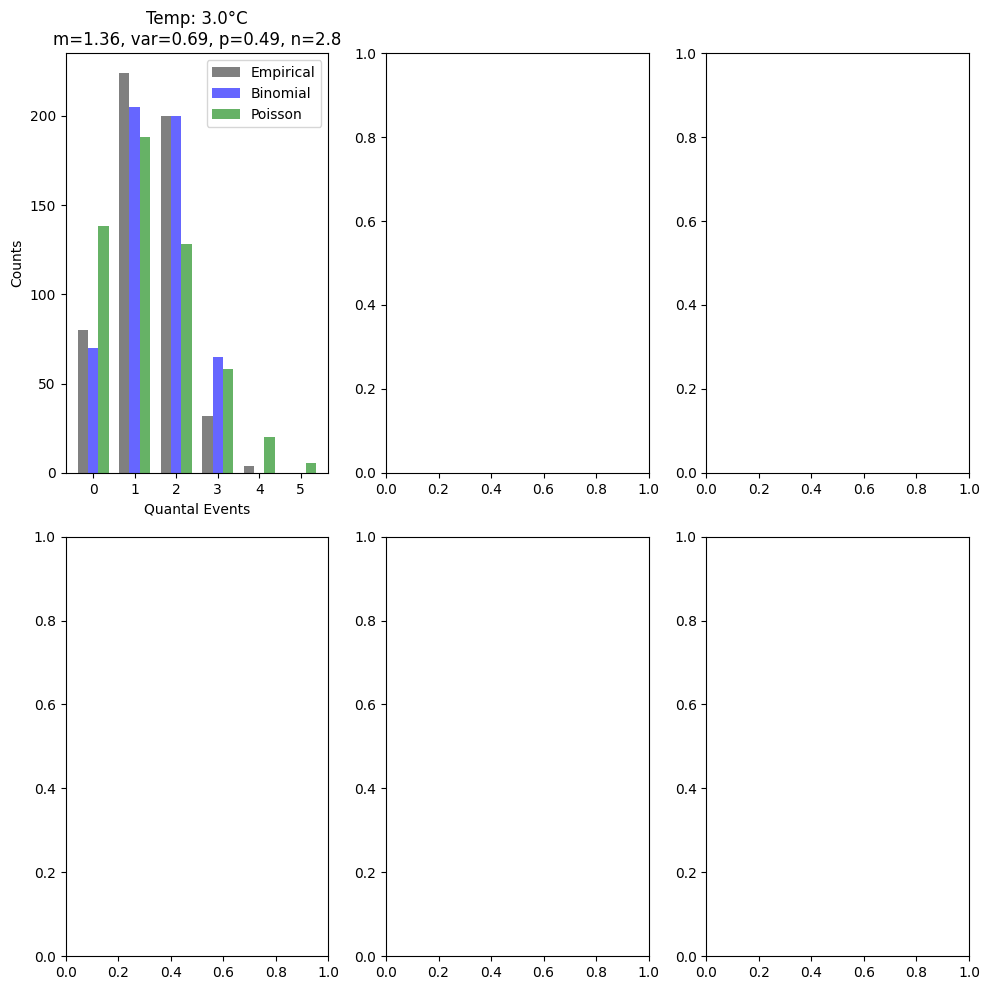

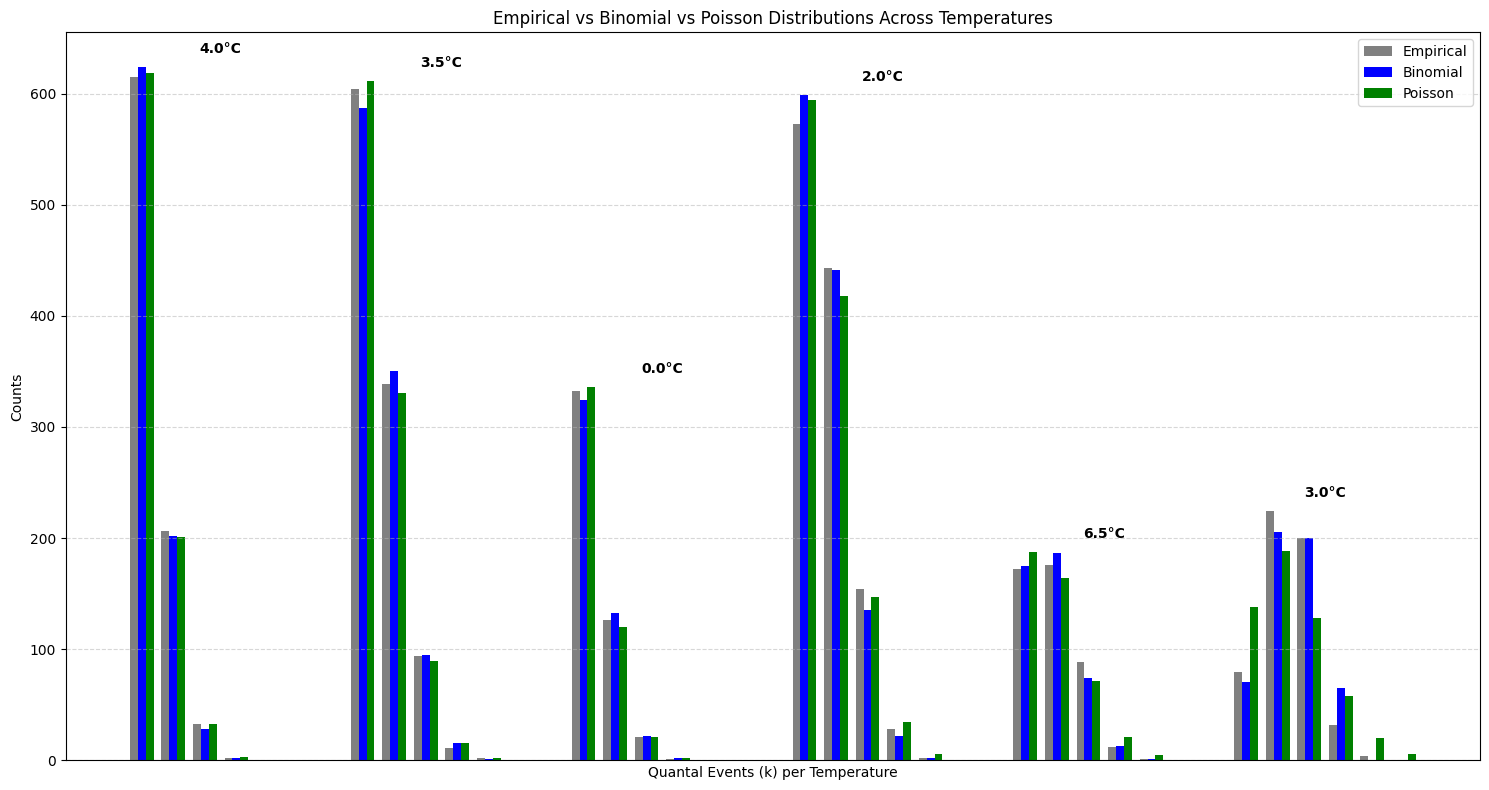

In [14]:
#Bonus questions, trying this alone!!
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import binom, poisson

n=14
#got this from chatgpt
data = pd.DataFrame({
    'Temp (°C)': [4.0, 3.5, 0.0, 2.0, 6.5, 3.0],
    'n0':        [615, 604, 332, 573, 172, 80],
    'n1':        [206, 339, 126, 443, 176, 224],
    'n2':        [33,  94,  21,  154, 89,  200],
    'n3':        [2,   11,  1,   28,  12,  32],
    'n4':        [0,   2,   0,   2,   1,   4],
    'n5+':       [0,   0,   0,   0,   0,   0]
})
#also got this from chat, but makes sense, we want all posible 'ks" from each N
k_values = np.array([0, 1, 2, 3, 4, 5])

results = []


#run a bunch of "binomia curves" with each temperature! right?
#Yes chat got me this
# Analyze each experiment
for index, row in data.iterrows():
    counts = np.array([row['n0'], row['n1'], row['n2'], row['n3'], row['n4'], row['n5+']])
    total_trials = counts.sum()

    empirical_k = k_values

#Basically getting an actual K value from each n!
#Now this is some fancy stuff, getting the mean and varience from n
# Compute empirical mean and variance
    m = np.sum(empirical_k * counts) / total_trials
    var = np.sum((empirical_k - m)**2 * counts) / total_trials

 # Estimate binomial parameters
    p = 1 - (var / m) if m > 0 else 0
    n = m / p if p > 0 else 0
  # Binomial expected counts
    binom_probs = binom.pmf(empirical_k, int(round(n)), p)
    binom_expected = binom_probs * total_trials

    # Poisson expected counts
    poisson_probs = poisson.pmf(empirical_k, m)
    poisson_expected = poisson_probs * total_trials
#Fancy stuff that we just got explained by Bijon

results.append({
        'temp': row['Temp (°C)'],
        'counts': counts,
        'binom_expected': binom_expected,
        'poisson_expected': poisson_expected,
        'mean': m,
        'var': var,
        'p': p,
        'n': n
    })


#now some chat magic making the graphs!
# Plotting
fig, axs = plt.subplots(2, 3, figsize=(10, 10))
axs = axs.flatten()

for i, res in enumerate(results):
    ax = axs[i]
    width = 0.25
    x = np.arange(len(k_values))

    ax.bar(x - width, res['counts'], width=width, label='Empirical', color='gray')
    ax.bar(x, res['binom_expected'], width=width, label='Binomial', color='blue', alpha=0.6)
    ax.bar(x + width, res['poisson_expected'], width=width, label='Poisson', color='green', alpha=0.6)

    ax.set_title(f"Temp: {res['temp']}°C\nm={res['mean']:.2f}, var={res['var']:.2f}, p={res['p']:.2f}, n={res['n']:.1f}")
    ax.set_xticks(x)
    ax.set_xticklabels([str(k) for k in k_values])
    ax.set_xlabel("Quantal Events")
    ax.set_ylabel("Counts")
    ax.legend()

plt.tight_layout()
plt.show()

#This looks funky, let me try to get a graph for each temperature
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import binom, poisson

# Load data
data = pd.DataFrame({
    'Temp (°C)': [4.0, 3.5, 0.0, 2.0, 6.5, 3.0],
    'n0': [615, 604, 332, 573, 172, 80],
    'n1': [206, 339, 126, 443, 176, 224],
    'n2': [33, 94, 21, 154, 89, 200],
    'n3': [2, 11, 1, 28, 12, 32],
    'n4': [0, 2, 0, 2, 1, 4],
    'n5+': [0, 0, 0, 0, 0, 0]
})

# Event categories
k_values = np.array([0, 1, 2, 3, 4, 5])

# Initialize plot
plt.figure(figsize=(15, 8))

bar_width = 0.25
offsets = [-bar_width, 0, bar_width]
colors = ['gray', 'blue', 'green']
labels = ['Empirical', 'Binomial', 'Poisson']

# Loop through each experiment
for i, (_, row) in enumerate(data.iterrows()):
    temp = row['Temp (°C)']
    counts = np.array([row['n0'], row['n1'], row['n2'], row['n3'], row['n4'], row['n5+']])
    total_trials = counts.sum()

    m = np.sum(k_values * counts) / total_trials
    var = np.sum((k_values - m)**2 * counts) / total_trials
    p = 1 - (var / m) if m > 0 else 0
    n = m / p if p > 0 else 0

    binom_probs = binom.pmf(k_values, int(round(n)), p)
    binom_expected = binom_probs * total_trials

    poisson_probs = poisson.pmf(k_values, m)
    poisson_expected = poisson_probs * total_trials

    # X positions shifted by temperature
    x = np.arange(len(k_values)) + i * (len(k_values) + 1)

    # Plot bars
    plt.bar(x + offsets[0], counts, width=bar_width, color=colors[0])
    plt.bar(x + offsets[1], binom_expected, width=bar_width, color=colors[1])
    plt.bar(x + offsets[2], poisson_expected, width=bar_width, color=colors[2])

    # Add temperature label
    mid_x = x.mean()
    plt.text(mid_x, max(counts.max(), binom_expected.max(), poisson_expected.max()) + 10,
             f"{temp}°C", ha='center', va='bottom', fontsize=10, fontweight='bold')

# Formatting
plt.xlabel("Quantal Events (k) per Temperature")
plt.ylabel("Counts")
plt.title("Empirical vs Binomial vs Poisson Distributions Across Temperatures")
plt.xticks([], [])  # Hide x-axis ticks because we label temps with text
plt.legend(labels)
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

#Ok this looks cooler

In [15]:
#Ok this looks cooler

#I know this is not part of it but I feel like I want to see if temperature
#changes the probaibity of release, so run an ANOVA?
import pandas as pd
import numpy as np
from scipy.stats import f_oneway

# Load data
data = pd.DataFrame({
    'Temp (°C)': [4.0, 3.5, 0.0, 2.0, 6.5, 3.0],
    'n0': [615, 604, 332, 573, 172, 80],
    'n1': [206, 339, 126, 443, 176, 224],
    'n2': [33, 94, 21, 154, 89, 200],
    'n3': [2, 11, 1, 28, 12, 32],
    'n4': [0, 2, 0, 2, 1, 4],
    'n5+': [0, 0, 0, 0, 0, 0]
})

# Event counts
k_values = np.array([0, 1, 2, 3, 4, 5])

# Reconstruct full trial-level data for each temperature
grouped_data = []

for _, row in data.iterrows():
    releases = []
    for k, col in zip(k_values, ['n0', 'n1', 'n2', 'n3', 'n4', 'n5+']):
        releases.extend([k] * int(row[col]))
    grouped_data.append(releases)

# Perform one-way ANOVA
anova_result = f_oneway(*grouped_data)

# Print result
print("ANOVA result:")
print(f"F-statistic: {anova_result.statistic:.4f}")
print(f"P-value: {anova_result.pvalue:.4e}")

ANOVA result:
F-statistic: 169.7013
P-value: 5.0393e-166


In [ ]:
#no idea if this is correct, but looks cool!
